In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('C:/Users/saide/Desktop/study/python_upskill/ml_algorithms/house_price.csv')

In [3]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [4]:
df = df.drop_duplicates()
df = df.fillna(df.median(numeric_only=True))
df = df.select_dtypes(include=[np.number])

In [5]:
target_col = "House_Price"  
X = df.drop(columns=[target_col])
y = df[target_col]

In [6]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [9]:
class LassoRegressionScratch:
    def __init__(self, n_iters=2000, lambda_=0.1):
        self.n_iters = n_iters
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
        self.loss_history = []
    @staticmethod
    def _soft_threshold(z, gamma):
        if z > gamma:
            return z - gamma
        elif z < -gamma:
            return z + gamma
        else:
            return 0.0
    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float).reshape(-1)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = np.mean(y)
        self.loss_history = []
        X_sq_sum = np.sum(X ** 2, axis=0)
        for _ in range(self.n_iters):
            self.bias = np.mean(y - X @ self.weights)
            for j in range(n_features):
                y_pred_wo_j = X @ self.weights + self.bias - X[:, j] * self.weights[j]
                residual = y - y_pred_wo_j
                z = np.dot(X[:, j], residual)
                gamma = self.lambda_ * n_samples
                self.weights[j] = self._soft_threshold(z, gamma) / (X_sq_sum[j] + 1e-12)
            y_pred = X @ self.weights + self.bias
            mse = np.mean((y - y_pred) ** 2)
            l1_penalty = self.lambda_ * np.sum(np.abs(self.weights))
            self.loss_history.append(mse + l1_penalty)
    def predict(self, X):
        X = np.array(X, dtype=float)
        return X @ self.weights + self.bias

In [10]:
lasso = LassoRegressionScratch(n_iters=2000, lambda_=0.1)
lasso.fit(X_train_scaled, y_train.values)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Metrics")
print("MSE :", mse_lasso)
print("RMSE:", rmse_lasso)
print("MAE :", mae_lasso)
print("R2  :", r2_lasso)

Lasso Regression Metrics
MSE : 101434962.53294031
RMSE: 10071.492567288144
MAE : 8174.599337201589
R2  : 0.9984263611376591


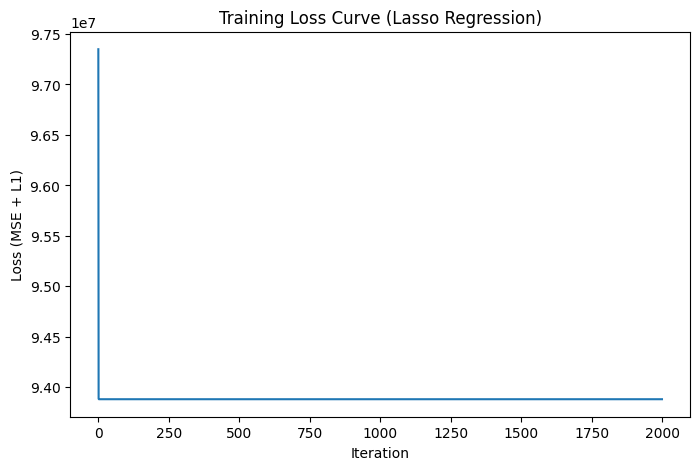

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(lasso.loss_history)
plt.title("Training Loss Curve (Lasso Regression)")
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE + L1)")
plt.show()

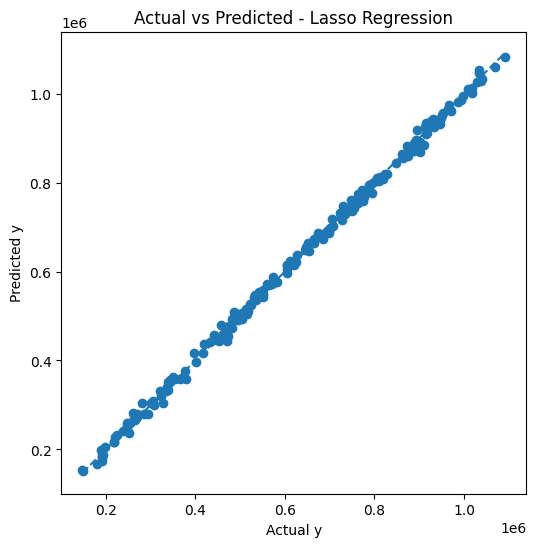

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.title("Actual vs Predicted - Lasso Regression")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.show()


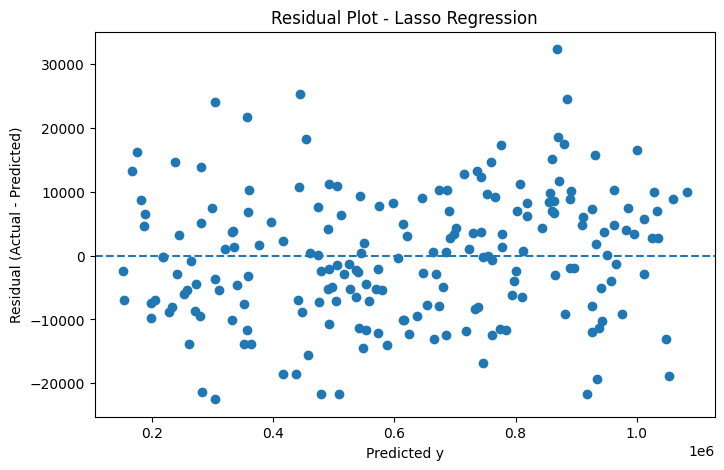

In [13]:
residuals_lasso = y_test.values - y_pred_lasso

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_lasso, residuals_lasso)
plt.axhline(0, linestyle='--')
plt.title("Residual Plot - Lasso Regression")
plt.xlabel("Predicted y")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

In [14]:
lasso_results = pd.DataFrame([{
    "Model": "Lasso Regression (Scratch)",
    "MSE": mse_lasso,
    "RMSE": rmse_lasso,
    "MAE": mae_lasso,
    "R2": r2_lasso,
    "Non-zero Weights": np.sum(np.abs(lasso.weights) > 1e-8)
}])

lasso_results

,Model,MSE,RMSE,MAE,R2,Non-zero Weights
0,Lasso Regression (Scratch),1.014350e+08,10071.492567,8174.599337,0.998426,7
